In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import pmdarima
import arch
import copulas
import copulalib
from copulalib.copulalib import Copula
from outliers import smirnov_grubbs as grubbs
from scipy.stats import norm
from matplotlib.dates import MONDAY
from matplotlib.dates import WeekdayLocator
import matplotlib.ticker as ticker
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss, coint
import statsmodels.tsa.stattools as smtools
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.api import VAR
import yfinance as yf
from statsmodels.tsa.stattools import grangercausalitytests
import arch
from pandas.plotting import autocorrelation_plot
from arch.univariate import GARCH
from arch.univariate import EGARCH
from arch.unitroot import engle_granger
from scipy.stats import pearsonr
from sklearn import metrics
from statsmodels.api import OLS
from statsmodels.tsa.vector_ar.vecm import VECM
import warnings
warnings.filterwarnings('ignore')

# Step 1. Data Importing #

In [2]:
#(1.1) creating the gold ETF data frame
gold_etf = yf.Ticker('GLD')

df_goldetf = gold_etf.history(start="2020-04-01",  end="2020-12-31")
df_goldetf_Q2 = gold_etf.history(start="2020-04-01",  end="2020-06-30")
df_goldetf_Q3 = gold_etf.history(start="2020-07-01",  end="2020-09-30")
df_goldetf_Q4 = gold_etf.history(start="2020-10-01",  end="2020-12-31")


df_goldetf = gold_etf.history(start="2020-04-01",  end="2020-12-31")
df_goldetf.index = pd.to_datetime(df_goldetf.index)
df_goldetf = df_goldetf.sort_index(ascending = True)
df_goldetf = df_goldetf.astype(float)
#print(df_goldetf.index)
df_goldetf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-31,151.360001,151.800003,147.970001,148.050003,13319500.0,0.0,0.0
2020-04-01,148.199997,150.080002,147.850006,149.449997,11827400.0,0.0,0.0
2020-04-02,151.199997,152.500000,150.699997,151.899994,9188300.0,0.0,0.0
2020-04-03,152.229996,153.089996,151.660004,152.649994,8469100.0,0.0,0.0
2020-04-06,154.160004,157.220001,153.960007,156.880005,14739300.0,0.0,0.0


In [3]:
#(1.2) creating the equity ETF dataframe
equity_etf = yf.Ticker('CSUK.L')
df_equityetf = equity_etf.history(start="2020-03-30",  end="2020-12-31")
df_equityetf1 = equity_etf.history(start="2020-04-01",  end="2020-12-31")

df_equityetf_Q2 = equity_etf.history(start="2020-04-01",  end="2020-06-30")
df_equityetf_Q3 = equity_etf.history(start="2020-07-01",  end="2020-09-30")
df_equityetf_Q4 = equity_etf.history(start="2020-10-01",  end="2020-12-31")


df_equityetf.index = pd.to_datetime(df_equityetf.index)
df_equityetf = df_equityetf.sort_index(ascending = True)
df_equityetf = df_equityetf.astype(float)
df_equityetf1.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-31,8615.0,8634.0,8396.000000,8639.0,517,0,0
2020-04-01,8285.0,8358.0,8285.000000,8265.5,4250,0,0
2020-04-02,8332.0,8371.0,8240.000000,8324.0,2125,0,0
2020-04-03,8263.0,8263.0,8219.200195,8219.0,1049,0,0
2020-04-06,8475.0,8476.0,8376.000000,8483.0,790,0,0


In [4]:
#(1.3) creating the bitcoin dataframe
bitcoin = yf.Ticker('BTC-USD')
df_bitcoin = bitcoin.history(start="2020-04-01",  end="2020-12-31")

df_bitcoin_Q2 = bitcoin.history(start="2020-04-01",  end="2020-06-30")
df_bitcoin_Q3 = bitcoin.history(start="2020-07-01",  end="2020-09-30")
df_bitcoin_Q4 = bitcoin.history(start="2020-10-01",  end="2020-12-31")

df_bitcoin.index = pd.to_datetime(df_bitcoin.index)
df_bitcoin = df_bitcoin.sort_index(ascending = True)
df_bitcoin = df_bitcoin.astype(float)
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-31,6430.606445,6504.515137,6374.162109,6438.644531,3.278647e+10,0.0,0.0
2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,4.034643e+10,0.0,0.0
2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,4.766065e+10,0.0,0.0
2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,3.897650e+10,0.0,0.0
2020-04-04,6738.382812,6878.953613,6696.484863,6867.527344,3.318599e+10,0.0,0.0


# Steps 2 & 3. Data Processing, Data Summaries and Extreme Values #

In [5]:
#(2.1), (3.1) Daily return on gold etf, equity etf and bitcoin
df_goldetf_daily_return = pd.DataFrame(np.log(df_goldetf['Close']/df_goldetf['Close'].shift(1)).iloc[1:].rename('Gold ETF Daily Returns'))
df_equityetf_daily_return = pd.DataFrame(np.log(df_equityetf['Close']/df_equityetf['Close'].shift(1)).iloc[1:].rename('Equity ETF Daily Returns'))
df_bitcoin_daily_return = pd.DataFrame(np.log(df_bitcoin['Close']/df_bitcoin['Close'].shift(1)).iloc[1:].rename('Bitcoin-USD Daily Returns'))

In [6]:
#(3.2) Kurtosis for gold etf, equity etf and bitcoin return series
goldetfreturn_kurt = df_goldetf_daily_return.kurtosis()
equityetfreturn_kurt = df_equityetf_daily_return.kurtosis()
bitcoinreturn_kurt = df_bitcoin_daily_return.kurtosis()

print("Fisher's Kurtosis for Gold ETF Apr'20-Dec'20 Returns =", goldetfreturn_kurt[0])
print("Fisher's Kurtosis for Equity ETF Apr'20-Dec'20 Returns =", equityetfreturn_kurt[0])
print("Fisher's Kurtosis for Bitcoin Apr'20-Dec'20 Returns =", bitcoinreturn_kurt[0])

Fisher's Kurtosis for Gold ETF Apr'20-Dec'20 Returns = 4.30760339618578
Fisher's Kurtosis for Equity ETF Apr'20-Dec'20 Returns = 0.850993827042342
Fisher's Kurtosis for Bitcoin Apr'20-Dec'20 Returns = 2.7219311764856764


Fisher's kurtosis captures the excess kurtosis relative to that of a normal distribution (mesokurtic, kurtosis = 3). Accordingly, distributions with Fisher's kurtosis > 0 are leptokurtic. This is the case for all 3 return series. Leptokurtic returns imply higher probability for extremely low or extremely high returns and associated higher value at risk. 

In [7]:
#(3.3) Chosen Metric/ Tool to Detect Extreme Values and Rationale for the Choice

We use boxplots on data from Apr 2020 to Dec 2020 to visualise the three distributions. A boxplot graphically depicts the spread of a distribution with 5 measures of location viz. the median, the first and third quartiles and the maximum and minimum values. 

We use the boxplot because typically, the maximum and minimum values in the construction of a boxplot are defined as follows:
- Maximum: Q3 + 1.5 x (Inter-quartile range)
- Minimum: Q1 - 1.5 x (Inter-quartile range)

Any values which lie beyond the minimum and maximum defined above are treated as outliers/ extreme values, which seems to be a reasonable definition. We complement the results from the boxplot with those from the Grubbs test for extreme values, to identify the series with the most extreme values.

[Text(0.5, 0, 'Boxplot 0: Gold ETF Daily Returns, Boxplot 1: Equity ETF Daily Returns, Boxplot 2: Bitcoin-USD Daily Returns')]

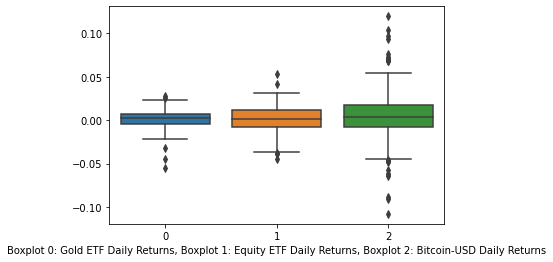

In [8]:
#(3.4) Boxplot for gold etf, equity etf and bitcoin return series
boxplotdata = [df_goldetf_daily_return['Gold ETF Daily Returns'].to_numpy(), df_equityetf_daily_return['Equity ETF Daily Returns'].to_numpy(), df_bitcoin_daily_return['Bitcoin-USD Daily Returns'].to_numpy()]
equityetfreturn_boxplot = sns.boxplot(data = boxplotdata).set(xlabel ='Boxplot 0: Gold ETF Daily Returns, Boxplot 1: Equity ETF Daily Returns, Boxplot 2: Bitcoin-USD Daily Returns')
equityetfreturn_boxplot

In [9]:
#(3.4) Grubbs Test for Extreme Value Detection

#Gold ETF Returns
goldarray = df_goldetf_daily_return['Gold ETF Daily Returns'].to_numpy()
goldtest = grubbs.test(goldarray, alpha = 0.05)
diff_gold = set(goldarray) - set(goldtest)


#Equity ETF Returns
equityarray = df_equityetf_daily_return['Equity ETF Daily Returns'].to_numpy()
equitytest = grubbs.test(equityarray, alpha = 0.05)
diff_equity = set(equityarray) - set(equitytest)


#Bitcoin Returns
bitcoinarray = df_bitcoin_daily_return['Bitcoin-USD Daily Returns'].to_numpy()
bitcointest = grubbs.test(bitcoinarray, alpha = 0.05)
diff_bitcoin = set(bitcoinarray) - set(bitcointest)

print('Gold ETF Return Extreme Values =', diff_gold)
print('Equity ETF Return Extreme Values =', diff_equity)
print('Bitcoin Return Extreme Values =', diff_bitcoin)

Gold ETF Return Extreme Values = {-0.0551897267189793, -0.045280856143465276}
Equity ETF Return Extreme Values = set()
Bitcoin Return Extreme Values = {-0.108024907829682, 0.11984140644428902}


# Step 4. Data Comparison and Copulas #

In [10]:
#(4.1)

Gold ETF and Bitcoin returns seem to have the most outliers, based on the boxplots and the results of the Grubbs test. So, we use these 2 series to fit Copulas

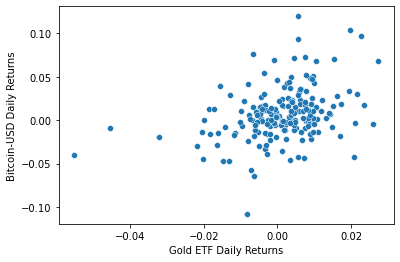

In [11]:
#(4.2) Plotting Gold ETF Returns vs. Bitcoin Returns
scatterplotdf = pd.DataFrame()
scatterplotdf['Gold ETF Daily Returns'] = df_goldetf_daily_return['Gold ETF Daily Returns']
scatterplotdf['Bitcoin-USD Daily Returns'] = df_bitcoin_daily_return['Bitcoin-USD Daily Returns']

sns.scatterplot(data = scatterplotdf,x = 'Gold ETF Daily Returns', y = 'Bitcoin-USD Daily Returns')

In [12]:
#(4.3) Fitting Copulas

In [13]:
# Copula class
plt.style.use('ggplot')

class copulaClass(object):

    # Available copulas
    families = ['frank','clayton','gumbel']

    def __init__(self,x,y):
        # Information about the data
        self.x = x
        self.y = y
        self.mu_x = np.array(x).mean()
        self.mu_y = np.array(y).mean()
        self.std_x = np.array(x).std()
        self.std_y = np.array(y).std()

        # Information about the copula
        self.cop = 0
        self.famil = 0
        self.tau_ = 0
        self.sr_ = 0
        self.theta_ = 0

    def showAvailableCopulas(self):
        """This function plots available copulas
           to give you a visual insight      """

        # Random simulated data
        x = np.random.normal(size=250)
        y = 2.5*x + np.random.normal(size=250)
        fig = plt.figure()

        # Frank
        frank = Copula(x,y,family='frank')
        uf,vf = frank.generate_uv(250)
        fig.add_subplot(2,2,1)
        plt.scatter(uf,vf,marker='.',color='blue')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title('Frank copula')

        # Clayton
        clayton = Copula(x,y,family='clayton')
        uc,vc = clayton.generate_uv(250)
        fig.add_subplot(2,2,2)
        plt.scatter(uc,vc,marker='.',color='red')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title('Clayton copula')

        # Gumbel
        gumbel = Copula(x,y,family='gumbel')
        ug,vg = gumbel.generate_uv(250)
        fig.add_subplot(2,2,3)
        plt.scatter(ug,vg,marker='.',color='green')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title('Gumbel copula')

        plt.show()
        

    def plotData(self):
        """This function plots the data you've fed in
           to give you a visual insight of the correlation
           structure and the marginal distributions """
        x = self.x
        y = self.y
        fig = plt.figure()
        fig.add_subplot(2,2,1)
        plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
        plt.title('Gold ETF Returns Distribution')
        fig.add_subplot(2,2,3)
        plt.scatter(x,y,marker="o",alpha=0.8)
        fig.add_subplot(2,2,4)
        plt.title('Joint X,Y')
        plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
        plt.title('Bitcoin Returns Distribution')    
        plt.show()

    def generateCopula(self,fam,plot=False):
        """Generate the copula and optionally plot it"""
        
        if fam.lower() not in self.families:
            raise ValueError('Please select a valid family name')

        # Copula generation
        self.famil = fam.lower()
        c = Copula(self.x,self.y,family=fam.lower())
        self.cop = c

        # Parameters are estimated and set
        self.tau_ = c.tau
        self.sr_ = c.sr
        self.theta_ = c.theta

        if plot:
            u,v = c.generate_uv(1000)
            plt.scatter(u,v,marker='.',color='red')
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.title(fam.lower().capitalize()+' Copula 1000 pseudo observations')
            plt.show()

    def printCorrelation(self):
        # Print details about correlations and parameters
        print("#################################################")
        print("Correlation details:")
        print("Correlation index range: [-1,1] [negative,positive]")
        print("Kendall's tau:",self.tau_)
        print("Spearman's rho:",self.sr_)
        print("Parameter of the copula (theta):",self.theta_)
        print("#################################################")

    def generatePseudoObs(self,n=1000,plot=False):
        """This function generates and returns simulated pseudo observations """
        
        if self.famil == 0:
            raise ValueError('Generate copula first')

        u,v = self.cop.generate_uv(n)

        if plot:
            plt.scatter(u,v,marker='.',color='red')
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.title(self.famil.capitalize()+' Copula 1000 pseudo observations')
            plt.show()
            
        return u,v

    def getSimulatedData(self,dist='normal',n=1000):
        """This function simulates real observations assuming that your data
           is normally distributed. Optionally you can edit this function and
           choose the distribution that fits your data best"""

        if dist.lower() == 'normal':
            u,v = self.generatePseudoObs(n=n)
            x = norm.ppf(u,loc=self.mu_x,scale=self.std_x)
            y = norm.ppf(v,loc=self.mu_y,scale=self.std_y)
            return x,y

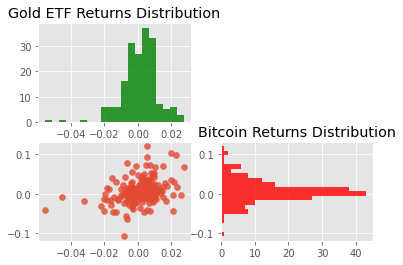

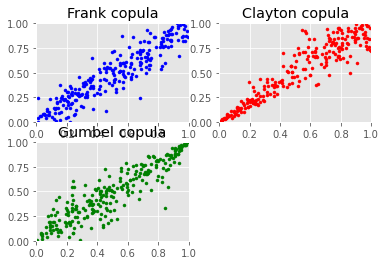

In [14]:
# Gold ETF Returns vs Bitcoin Returns
x = scatterplotdf.dropna()['Gold ETF Daily Returns']
y = scatterplotdf.dropna()['Bitcoin-USD Daily Returns']

# Generate a copulaClass instance
a = copulaClass(x,y)

# Visualize the data
a.plotData()

# Show 3 copulas viz. Frank, Gumbel and Clayton
a.showAvailableCopulas()

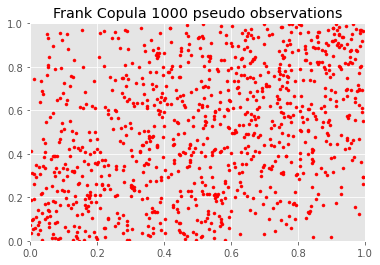

#################################################
Correlation details:
Correlation index range: [-1,1] [negative,positive]
Kendall's tau: 0.22313281022958437
Spearman's rho: 0.324140631920518
Parameter of the copula (theta): 2.09368896484375
#################################################


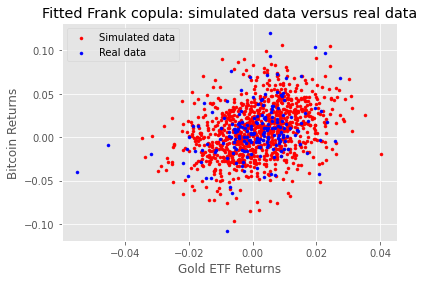

In [15]:
# Fitting the Frank copula
a.generateCopula('frank',plot=True)

# Print parameters
a.printCorrelation()

# Simulate data and plot real observations versus simulated obs.
c,d = a.getSimulatedData()
plt.scatter(c,d,color="red",label="Simulated data",marker='.')
plt.scatter(x,y,color="blue",label="Real data",marker='.')
plt.legend()
plt.title("Fitted Frank copula: simulated data versus real data")
plt.xlabel('Gold ETF Returns')
plt.ylabel('Bitcoin Returns')
plt.show()

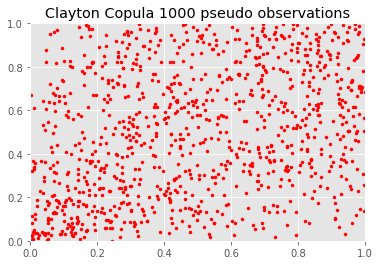

#################################################
Correlation details:
Correlation index range: [-1,1] [negative,positive]
Kendall's tau: 0.22313281022958437
Spearman's rho: 0.324140631920518
Parameter of the copula (theta): 0.5744426155918
#################################################


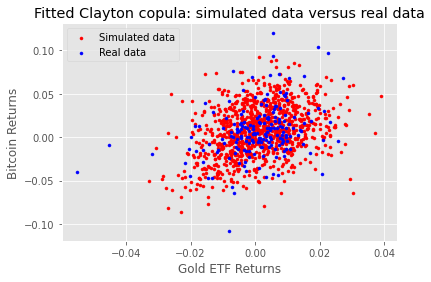

In [16]:
# Fitting the Clayton copula
a.generateCopula('clayton',plot=True)

# Print parameters
a.printCorrelation()

# Simulate data and plot real observations versus simulated obs.
c,d = a.getSimulatedData()
plt.scatter(c,d,color="red",label="Simulated data",marker='.')
plt.scatter(x,y,color="blue",label="Real data",marker='.')
plt.legend()
plt.title("Fitted Clayton copula: simulated data versus real data")
plt.xlabel('Gold ETF Returns')
plt.ylabel('Bitcoin Returns')
plt.show()

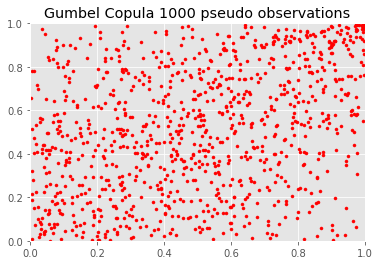

#################################################
Correlation details:
Correlation index range: [-1,1] [negative,positive]
Kendall's tau: 0.22313281022958437
Spearman's rho: 0.324140631920518
Parameter of the copula (theta): 1.2872213077959
#################################################


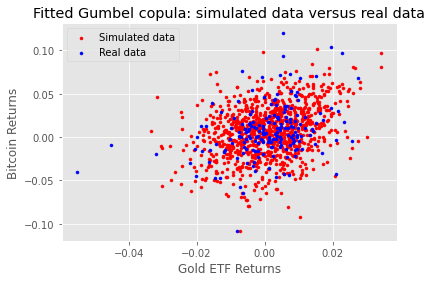

In [17]:
# Fitting the Gumbel copula
a.generateCopula('gumbel',plot=True)

# Print parameters
a.printCorrelation()

# Simulate data and plot real observations versus simulated obs.
c,d = a.getSimulatedData()
plt.scatter(c,d,color="red",label="Simulated data",marker='.')
plt.scatter(x,y,color="blue",label="Real data",marker='.')
plt.legend()
plt.title("Fitted Gumbel copula: simulated data versus real data")
plt.xlabel('Gold ETF Returns')
plt.ylabel('Bitcoin Returns')
plt.show()

# Step 5. Category 1 Models Using Equity ETF #

In [18]:
#(5.1)

Out of the 3 return series, we choose to implement a trading strategy on our chosen Equity ETF. Our strategy in this step uses ARMA and ARMA-GARCH(1,1) models to predict one-day returns of the Equity ETF using a rolling window of 60 days over 2 time periods Q2 2020 - Q3 2020 and Q3 2020 - Q4 2020. 

If the predicted return comes out to be positive, our portfolio will go long the Equity ETF for that day whereas if it is negative, it goes short the Equity ETF for the same day. The resulting evolution of our ARMA/ ARMA-GARCH based portfolios is then compared to a portfolio which adopts a simple buy-and-hold strategy.

## (5.2), (5.4), (5.5) Trading Strategy Creating ARMA-based Predictive Signals (Q2-Q3 2020)

In [19]:
df_equityetf_daily_return = df_equityetf_daily_return.rename(columns = {'Equity ETF Daily Returns':'Log Return'})
df_equityetf_daily_return_Q2Q3 = df_equityetf_daily_return['2020-03-31':'2020-10-01']
df_equityetf_daily_return_Q2Q3

,Log Return
Date,
2020-03-31,0.014047
2020-04-01,-0.044197
2020-04-02,0.007053
2020-04-03,-0.012694
2020-04-06,0.031616
...,...
2020-09-25,0.000282
2020-09-28,0.020020
2020-09-29,-0.007893


In [20]:
# Create the windowed dataset
equityetfreturnsQ2Q3 = df_equityetf_daily_return_Q2Q3['Log Return']
windowLengthQ2Q3 = 60
foreLengthQ2Q3 = len(equityetfreturnsQ2Q3) - windowLengthQ2Q3

windowed_dsQ2Q3 = []
for d in range(foreLengthQ2Q3-1):
    windowed_dsQ2Q3.append(equityetfreturnsQ2Q3[d:d + windowLengthQ2Q3])

In [21]:
# Create the forecasts dataframe initialized with zeros
forecasts_arimaQ3 = equityetfreturnsQ2Q3.iloc[windowLengthQ2Q3:].copy() * 0

windowed_dsQ2Q3[0], forecasts_arimaQ3, windowed_dsQ2Q3[-1]

(Date
 2020-03-31    0.014047
 2020-04-01   -0.044197
 2020-04-02    0.007053
 2020-04-03   -0.012694
 2020-04-06    0.031616
 2020-04-07    0.020246
 2020-04-08   -0.006723
 2020-04-09    0.029959
 2020-04-14   -0.008387
 2020-04-15   -0.032799
 2020-04-16    0.006273
 2020-04-17    0.020533
 2020-04-20    0.006676
 2020-04-21   -0.026508
 2020-04-22    0.020004
 2020-04-23    0.009741
 2020-04-24   -0.011574
 2020-04-27    0.012650
 2020-04-28    0.021289
 2020-04-29    0.028579
 2020-04-30   -0.038663
 2020-05-01   -0.022366
 2020-05-04   -0.000859
 2020-05-05    0.016596
 2020-05-06    0.001802
 2020-05-07    0.014800
 2020-05-11   -0.001776
 2020-05-12    0.012747
 2020-05-13   -0.017926
 2020-05-14   -0.027908
 2020-05-15    0.011926
 2020-05-18    0.042044
 2020-05-19   -0.008137
 2020-05-20    0.010636
 2020-05-21   -0.008281
 2020-05-22   -0.004496
 2020-05-26    0.011800
 2020-05-27    0.011232
 2020-05-28    0.014607
 2020-05-29   -0.027796
 2020-06-01    0.017637
 2020-06-0

In [22]:
def fit_arima(series, range_p=range(0, 6), range_q=range(0, 6)):
    final_order = (0, 0, 0)
    best_aic = np.inf
    arima = pmdarima.ARIMA(order=final_order)

    for p in range_p:
        for q in range_q:
            if (p==0) and (q==0):
                next
            arima.order = (p, 0, q)
            arima.fit(series)

            aic = arima.aic()

            if aic < best_aic:
                best_aic = aic
                final_order = (p, 0, q)
                
    arima.order=final_order
    return arima.fit(series)

The below code snippet will take some time to run; please be patient. Wait until all predicted returns for the forecast horizon (Q3 2020) have been calculated

In [23]:
for i, window in enumerate(windowed_dsQ2Q3):
    
    arimaQ2Q3 = fit_arima(window)
    arima_predQ3 = arimaQ2Q3.predict(n_periods=1)
    
    forecasts_arimaQ3.iloc[i] = arima_predQ3

    print(f'Date {str(forecasts_arimaQ3.index[i].date())} : Fitted ARIMA order {arimaQ2Q3.order} - Prediction={forecasts_arimaQ3.iloc[i]}')
    

Date 2020-06-29 : Fitted ARIMA order (1, 0, 1) - Prediction=0.012767046391374735
Date 2020-06-30 : Fitted ARIMA order (1, 0, 1) - Prediction=0.009036659848101045
Date 2020-07-01 : Fitted ARIMA order (1, 0, 1) - Prediction=0.011359993462399715
Date 2020-07-02 : Fitted ARIMA order (1, 0, 1) - Prediction=0.012060012623333873
Date 2020-07-03 : Fitted ARIMA order (1, 0, 1) - Prediction=0.008453094619376197
Date 2020-07-06 : Fitted ARIMA order (1, 0, 1) - Prediction=0.011922781020095561
Date 2020-07-07 : Fitted ARIMA order (1, 0, 1) - Prediction=0.00528090570856197
Date 2020-07-08 : Fitted ARIMA order (4, 0, 5) - Prediction=0.0036312464293378893
Date 2020-07-09 : Fitted ARIMA order (4, 0, 3) - Prediction=-0.0025737737601022985
Date 2020-07-10 : Fitted ARIMA order (5, 0, 3) - Prediction=0.010043776280303044
Date 2020-07-13 : Fitted ARIMA order (4, 0, 5) - Prediction=0.01197271109748423
Date 2020-07-14 : Fitted ARIMA order (4, 0, 5) - Prediction=-0.0033746872670226734
Date 2020-07-15 : Fitted 

In [24]:
forecasts_arimaQ3 = forecasts_arimaQ3[(forecasts_arimaQ3.index>='2020-07-01') & (forecasts_arimaQ3.index<='2020-09-30')]

In [25]:
df_equityetf_daily_return_Q3_arima = df_equityetf_daily_return['2020-06-30':'2020-09-30']
df_equityetf_daily_return_Q3_arima['Positive/ Negative Return'] = np.sign(df_equityetf_daily_return_Q3_arima['Log Return'])
df_equityetf_daily_return_Q3_arima['Cumulative Log Return'] = df_equityetf_daily_return_Q3_arima['Log Return'].cumsum()
df_equityetf_daily_return_Q3_arima['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_daily_return_Q3_arima['Cumulative Log Return'])
df_equityetf_daily_return_Q3_arima.at['2020-06-30', 'Buy and Hold Strategy'] = 100
df_equityetf_daily_return_Q3_arima['Forecast Returns'] = forecasts_arimaQ3
df_equityetf_daily_return_Q3_arima['Trading Signal'] = np.sign(forecasts_arimaQ3)
df_equityetf_daily_return_Q3_arima['ARMA Strategy Cumulative Log Return'] = (df_equityetf_daily_return_Q3_arima['Log Return']*df_equityetf_daily_return_Q3_arima['Trading Signal']).cumsum()
df_equityetf_daily_return_Q3_arima['ARMA Strategy'] = 100*np.exp(df_equityetf_daily_return_Q3_arima['ARMA Strategy Cumulative Log Return'])
df_equityetf_daily_return_Q3_arima.at['2020-06-30', 'ARMA Strategy'] = 100
df_equityetf_daily_return_Q3_arima
df_equityetf_daily_return_Q3_arima.to_csv("ARMA_Q3.csv")

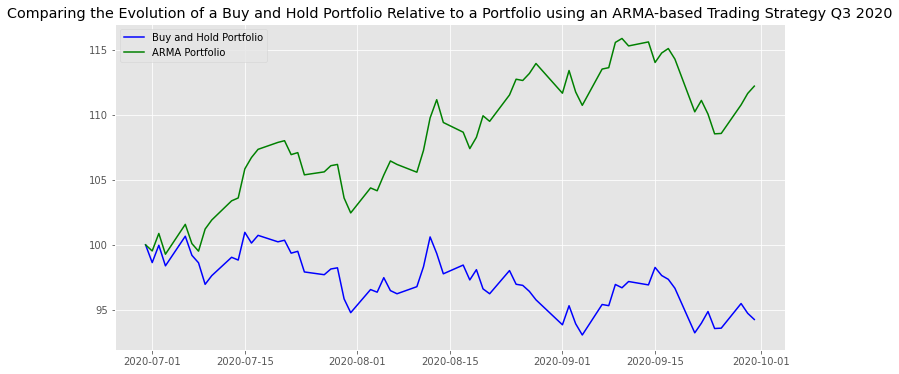

In [26]:
#Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-based Trading Strategy Q3 2020

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-based Trading Strategy Q3 2020')
ax.plot(df_equityetf_daily_return_Q3_arima['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_daily_return_Q3_arima['ARMA Strategy'], label = 'ARMA Portfolio', color = 'green')
ax.legend()
plt.show()

## (5.2), (5.4), (5.6) Trading Strategy Creating ARMA-GARCH(1,1)-based Predictive Signals (Q2-Q3 2020)

In [27]:
# Create the forecasts dataframe initialized with zeros
forecasts_arimagarchQ3 = equityetfreturnsQ2Q3.iloc[windowLengthQ2Q3:].copy() * 0

The below code snippet will take some time to run; please be patient. Wait until all predicted returns for the forecast horizon (Q3 2020) have been calculated

In [28]:
for i, window in enumerate(windowed_dsQ2Q3):
    
    #ARIMA model
    arimaQ2Q3 = fit_arima(window)
    arima_predQ3 = arimaQ2Q3.predict(n_periods=1)
    
    #GARCH model
    garchQ2Q3 = arch.arch_model(arimaQ2Q3.resid())
    garchQ2Q3_fit = garchQ2Q3.fit(disp='off', show_warning=False)
    garch_predQ3 = garchQ2Q3_fit.forecast(horizon=1).mean.iloc[-1]['h.1']
    
    forecasts_arimagarchQ3.iloc[i] = arima_predQ3 + garch_predQ3

    print(f'Date {str(forecasts_arimagarchQ3.index[i].date())} : Fitted ARIMA order {arimaQ2Q3.order} - Prediction={forecasts_arimagarchQ3.iloc[i]}')

Date 2020-06-29 : Fitted ARIMA order (1, 0, 1) - Prediction=0.013255142630044611
Date 2020-06-30 : Fitted ARIMA order (1, 0, 1) - Prediction=0.009199719185045604
Date 2020-07-01 : Fitted ARIMA order (1, 0, 1) - Prediction=0.013136634819585966
Date 2020-07-02 : Fitted ARIMA order (1, 0, 1) - Prediction=0.013657934817440941
Date 2020-07-03 : Fitted ARIMA order (1, 0, 1) - Prediction=0.010316576304590134
Date 2020-07-06 : Fitted ARIMA order (1, 0, 1) - Prediction=0.01320489230932375
Date 2020-07-07 : Fitted ARIMA order (1, 0, 1) - Prediction=0.005811944957470685
Date 2020-07-08 : Fitted ARIMA order (4, 0, 5) - Prediction=0.0026803891299132412
Date 2020-07-09 : Fitted ARIMA order (4, 0, 3) - Prediction=-0.00380462240002902
Date 2020-07-10 : Fitted ARIMA order (5, 0, 3) - Prediction=0.008760968222603995
Date 2020-07-13 : Fitted ARIMA order (4, 0, 5) - Prediction=0.01100059327585261
Date 2020-07-14 : Fitted ARIMA order (4, 0, 5) - Prediction=-0.004877206198787976
Date 2020-07-15 : Fitted ARI

In [29]:
forecasts_arimagarchQ3 = forecasts_arimagarchQ3[(forecasts_arimagarchQ3.index>='2020-07-01') & (forecasts_arimagarchQ3.index<='2020-09-30')]

In [30]:
df_equityetf_daily_return_Q3_arimagarch = df_equityetf_daily_return['2020-06-30':'2020-09-30']
df_equityetf_daily_return_Q3_arimagarch['Positive/ Negative Return'] = np.sign(df_equityetf_daily_return_Q3_arimagarch['Log Return'])
df_equityetf_daily_return_Q3_arimagarch['Cumulative Log Return'] = df_equityetf_daily_return_Q3_arimagarch['Log Return'].cumsum()
df_equityetf_daily_return_Q3_arimagarch['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_daily_return_Q3_arimagarch['Cumulative Log Return'])
df_equityetf_daily_return_Q3_arimagarch.at['2020-06-30', 'Buy and Hold Strategy'] = 100
df_equityetf_daily_return_Q3_arimagarch['Forecast Returns'] = forecasts_arimagarchQ3
df_equityetf_daily_return_Q3_arimagarch['Trading Signal'] = np.sign(forecasts_arimagarchQ3)
df_equityetf_daily_return_Q3_arimagarch['ARMA-GARCH(1,1) Strategy Cumulative Log Return'] = (df_equityetf_daily_return_Q3_arimagarch['Log Return']*df_equityetf_daily_return_Q3_arimagarch['Trading Signal']).cumsum()
df_equityetf_daily_return_Q3_arimagarch['ARMA-GARCH(1,1) Strategy'] = 100*np.exp(df_equityetf_daily_return_Q3_arimagarch['ARMA-GARCH(1,1) Strategy Cumulative Log Return'])
df_equityetf_daily_return_Q3_arimagarch.at['2020-06-30', 'ARMA-GARCH(1,1) Strategy'] = 100
df_equityetf_daily_return_Q3_arimagarch
df_equityetf_daily_return_Q3_arimagarch.to_csv("ARMA-GARCH_Q3.csv")

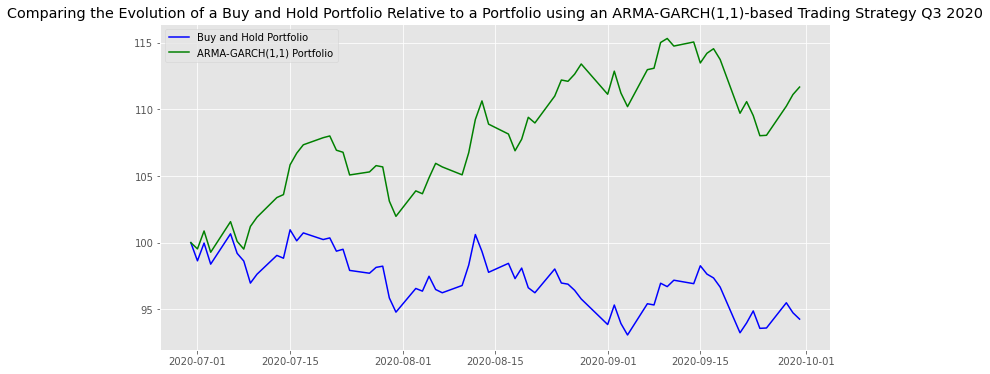

In [31]:
#Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-GARCH(1,1)-based Trading Strategy Q3 2020

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-GARCH(1,1)-based Trading Strategy Q3 2020')
ax.plot(df_equityetf_daily_return_Q3_arimagarch['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_daily_return_Q3_arimagarch['ARMA-GARCH(1,1) Strategy'], label = 'ARMA-GARCH(1,1) Portfolio', color = 'green')
ax.legend()
plt.show()

## (5.3), (5.4), (5.5) Trading Strategy Creating ARMA-based Predictive Signals (Q3-Q4 2020)

In [32]:
df_equityetf_daily_return = df_equityetf_daily_return.rename(columns = {'Equity ETF Daily Returns':'Log Return'})
df_equityetf_daily_return_Q3Q4 = df_equityetf_daily_return['2020-06-30':'2020-12-31']
df_equityetf_daily_return_Q3Q4

,Log Return
Date,
2020-06-30,-0.009028
2020-07-01,-0.004706
2020-07-02,0.013417
2020-07-03,-0.015939
2020-07-06,0.022843
...,...
2020-12-22,0.005989
2020-12-23,0.005903
2020-12-24,0.002111


In [33]:
# Create the windowed dataset
equityetfreturnsQ3Q4 = df_equityetf_daily_return_Q3Q4['Log Return']
windowLengthQ3Q4 = 60
foreLengthQ3Q4 = len(equityetfreturnsQ3Q4) - windowLengthQ3Q4

windowed_dsQ3Q4 = []
for d in range(foreLengthQ3Q4-1):
    windowed_dsQ3Q4.append(equityetfreturnsQ3Q4[d:d + windowLengthQ3Q4])

In [34]:
# Create the forecasts dataframe initialized with zeros
forecasts_arimaQ4 = equityetfreturnsQ3Q4.iloc[windowLengthQ3Q4:].copy() * 0

windowed_dsQ3Q4[0], forecasts_arimaQ4, windowed_dsQ3Q4[-1]

(Date
 2020-06-30   -0.009028
 2020-07-01   -0.004706
 2020-07-02    0.013417
 2020-07-03   -0.015939
 2020-07-06    0.022843
 2020-07-07   -0.014655
 2020-07-08   -0.005826
 2020-07-09   -0.016922
 2020-07-10    0.006846
 2020-07-13    0.014355
 2020-07-14   -0.002137
 2020-07-15    0.021329
 2020-07-16   -0.008202
 2020-07-17    0.005896
 2020-07-20   -0.004946
 2020-07-21    0.001212
 2020-07-22   -0.009953
 2020-07-23    0.001436
 2020-07-24   -0.016068
 2020-07-27   -0.002162
 2020-07-28    0.004481
 2020-07-29    0.000915
 2020-07-30   -0.024572
 2020-07-31   -0.011149
 2020-08-03    0.018567
 2020-08-04   -0.002083
 2020-08-05    0.011510
 2020-08-06   -0.010249
 2020-08-07   -0.002524
 2020-08-10    0.005642
 2020-08-11    0.015717
 2020-08-12    0.023016
 2020-08-13   -0.012692
 2020-08-14   -0.015878
 2020-08-17    0.006844
 2020-08-18   -0.011668
 2020-08-19    0.008063
 2020-08-20   -0.015151
 2020-08-21   -0.003893
 2020-08-24    0.018343
 2020-08-25   -0.010791
 2020-08-2

The below code snippet will take some time to run; please be patient. Wait until all predicted returns for the forecast horizon (Q4 2020) have been calculated

In [35]:
for i, window in enumerate(windowed_dsQ3Q4):
    
    # ARIMA model
    arimaQ3Q4 = fit_arima(window)
    arima_predQ4 = arimaQ3Q4.predict(n_periods=1)
    
    forecasts_arimaQ4.iloc[i] = arima_predQ4

    print(f'Date {str(forecasts_arimaQ4.index[i].date())} : Fitted ARIMA order {arimaQ3Q4.order} - Prediction={forecasts_arimaQ4.iloc[i]}')
    

Date 2020-09-23 : Fitted ARIMA order (1, 0, 4) - Prediction=-0.0031195614410844587
Date 2020-09-24 : Fitted ARIMA order (1, 0, 1) - Prediction=0.0007050196696906366
Date 2020-09-25 : Fitted ARIMA order (1, 0, 4) - Prediction=0.015615541606321899
Date 2020-09-28 : Fitted ARIMA order (2, 0, 1) - Prediction=0.0035555934606527166
Date 2020-09-29 : Fitted ARIMA order (1, 0, 1) - Prediction=-0.0026637858247007765
Date 2020-09-30 : Fitted ARIMA order (2, 0, 2) - Prediction=-0.0012554669111174864
Date 2020-10-01 : Fitted ARIMA order (2, 0, 2) - Prediction=0.00042389574212533274
Date 2020-10-02 : Fitted ARIMA order (1, 0, 1) - Prediction=-0.0002122664178356564
Date 2020-10-05 : Fitted ARIMA order (0, 0, 0) - Prediction=-0.0004140199660778218
Date 2020-10-06 : Fitted ARIMA order (2, 0, 2) - Prediction=-0.003909802379660982
Date 2020-10-07 : Fitted ARIMA order (2, 0, 2) - Prediction=-0.004743753744148118
Date 2020-10-08 : Fitted ARIMA order (1, 0, 1) - Prediction=-0.004448257306428508
Date 2020-1

In [36]:
forecasts_arimaQ4 = forecasts_arimaQ4[(forecasts_arimaQ4.index>='2020-10-01') & (forecasts_arimaQ4.index<='2020-12-31')]

In [37]:
df_equityetf_daily_return_Q4_arima = df_equityetf_daily_return['2020-09-30':'2020-12-31']
df_equityetf_daily_return_Q4_arima['Positive/ Negative Return'] = np.sign(df_equityetf_daily_return_Q4_arima['Log Return'])
df_equityetf_daily_return_Q4_arima['Cumulative Log Return'] = df_equityetf_daily_return_Q4_arima['Log Return'].cumsum()
df_equityetf_daily_return_Q4_arima['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_daily_return_Q4_arima['Cumulative Log Return'])
df_equityetf_daily_return_Q4_arima.at['2020-09-30', 'Buy and Hold Strategy'] = 100
df_equityetf_daily_return_Q4_arima['Forecast Returns'] = forecasts_arimaQ4
df_equityetf_daily_return_Q4_arima['Trading Signal'] = np.sign(forecasts_arimaQ4)
df_equityetf_daily_return_Q4_arima['ARMA Strategy Cumulative Log Return'] = (df_equityetf_daily_return_Q4_arima['Log Return']*df_equityetf_daily_return_Q4_arima['Trading Signal']).cumsum()
df_equityetf_daily_return_Q4_arima['ARMA Strategy'] = 100*np.exp(df_equityetf_daily_return_Q4_arima['ARMA Strategy Cumulative Log Return'])
df_equityetf_daily_return_Q4_arima.at['2020-09-30', 'ARMA Strategy'] = 100
df_equityetf_daily_return_Q4_arima

,Log Return,Positive/ Negative Return,Cumulative Log Return,Buy and Hold Strategy,Forecast Returns,Trading Signal,ARMA Strategy Cumulative Log Return,ARMA Strategy
Date,,,,,,,,
2020-09-30,-0.005035,-1.0,-0.005035,100.000000,NaN,NaN,NaN,100.000000
2020-10-01,0.001793,1.0,-0.003242,99.676339,0.000424,1.0,0.001793,100.179473
2020-10-02,0.001622,1.0,-0.001620,99.838170,-0.000212,-1.0,0.000171,100.017089
2020-10-05,0.009125,1.0,0.007505,100.753348,-0.000414,-1.0,-0.008954,99.108598
2020-10-06,-0.000166,-1.0,0.007339,100.736607,-0.003910,-1.0,-0.008788,99.125069
...,...,...,...,...,...,...,...,...
2020-12-22,0.005989,1.0,0.097793,110.273438,-0.005928,-1.0,0.002739,100.274247
2020-12-23,0.005903,1.0,0.103696,110.926339,0.001630,1.0,0.008642,100.867946
2020-12-24,0.002111,1.0,0.105807,111.160714,0.000342,1.0,0.010753,101.081069


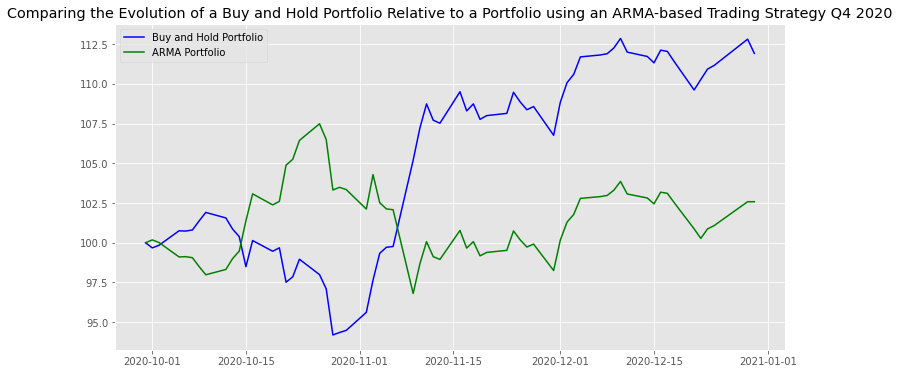

In [38]:
#Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-based Trading Strategy Q4 2020

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-based Trading Strategy Q4 2020')
ax.plot(df_equityetf_daily_return_Q4_arima['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_daily_return_Q4_arima['ARMA Strategy'], label = 'ARMA Portfolio', color = 'green')
ax.legend()
plt.show()

## (5.3), (5.4), (5.6) Trading Strategy Creating ARMA-GARCH(1,1)-based Predictive Signals (Q3-Q4 2020)

In [39]:
# Create the forecasts dataframe initialized with zeros
forecasts_arimagarchQ4 = equityetfreturnsQ3Q4.iloc[windowLengthQ3Q4:].copy() * 0

The below code snippet will take some time to run; please be patient. Wait until all predicted returns for the forecast horizon (Q4 2020) have been calculated

In [40]:
for i, window in enumerate(windowed_dsQ3Q4):
    
    #ARIMA model
    arimaQ3Q4 = fit_arima(window)
    arima_predQ4 = arimaQ3Q4.predict(n_periods=1)
    
    #GARCH model
    garchQ3Q4 = arch.arch_model(arimaQ3Q4.resid())
    garchQ3Q4_fit = garchQ3Q4.fit(disp='off', show_warning=False)
    garch_predQ4 = garchQ3Q4_fit.forecast(horizon=1).mean.iloc[-1]['h.1']
    
    forecasts_arimagarchQ4.iloc[i] = arima_predQ4 + garch_predQ4

    print(f'Date {str(forecasts_arimagarchQ4.index[i].date())} : Fitted ARIMA order {arimaQ3Q4.order} - Prediction={forecasts_arimagarchQ4.iloc[i]}')

Date 2020-09-23 : Fitted ARIMA order (1, 0, 4) - Prediction=-0.0031720402645840614
Date 2020-09-24 : Fitted ARIMA order (1, 0, 1) - Prediction=0.0010255557808327418
Date 2020-09-25 : Fitted ARIMA order (1, 0, 4) - Prediction=0.015902487774005884
Date 2020-09-28 : Fitted ARIMA order (2, 0, 1) - Prediction=0.003324330073622067
Date 2020-09-29 : Fitted ARIMA order (1, 0, 1) - Prediction=-0.0022195327787549904
Date 2020-09-30 : Fitted ARIMA order (2, 0, 2) - Prediction=-0.0015401460477436678
Date 2020-10-01 : Fitted ARIMA order (2, 0, 2) - Prediction=0.0006416713522155671
Date 2020-10-02 : Fitted ARIMA order (1, 0, 1) - Prediction=0.0001900377841909119
Date 2020-10-05 : Fitted ARIMA order (0, 0, 0) - Prediction=-0.0003728689852957647
Date 2020-10-06 : Fitted ARIMA order (2, 0, 2) - Prediction=-0.0034990703537892184
Date 2020-10-07 : Fitted ARIMA order (2, 0, 2) - Prediction=-0.004941717289169591
Date 2020-10-08 : Fitted ARIMA order (1, 0, 1) - Prediction=-0.004641561497387829
Date 2020-10-

In [41]:
forecasts_arimagarchQ4 = forecasts_arimagarchQ4[(forecasts_arimagarchQ4.index>='2020-10-01') & (forecasts_arimagarchQ4.index<='2020-12-31')]

In [42]:
df_equityetf_daily_return_Q4_arimagarch = df_equityetf_daily_return['2020-09-30':'2020-12-31']
df_equityetf_daily_return_Q4_arimagarch['Positive/ Negative Return'] = np.sign(df_equityetf_daily_return_Q4_arimagarch['Log Return'])
df_equityetf_daily_return_Q4_arimagarch['Cumulative Log Return'] = df_equityetf_daily_return_Q4_arimagarch['Log Return'].cumsum()
df_equityetf_daily_return_Q4_arimagarch['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_daily_return_Q4_arimagarch['Cumulative Log Return'])
df_equityetf_daily_return_Q4_arimagarch.at['2020-09-30', 'Buy and Hold Strategy'] = 100
df_equityetf_daily_return_Q4_arimagarch['Forecast Returns'] = forecasts_arimagarchQ4
df_equityetf_daily_return_Q4_arimagarch['Trading Signal'] = np.sign(forecasts_arimagarchQ4)
df_equityetf_daily_return_Q4_arimagarch['ARMA-GARCH(1,1) Strategy Cumulative Log Return'] = (df_equityetf_daily_return_Q4_arimagarch['Log Return']*df_equityetf_daily_return_Q4_arimagarch['Trading Signal']).cumsum()
df_equityetf_daily_return_Q4_arimagarch['ARMA-GARCH(1,1) Strategy'] = 100*np.exp(df_equityetf_daily_return_Q4_arimagarch['ARMA-GARCH(1,1) Strategy Cumulative Log Return'])
df_equityetf_daily_return_Q4_arimagarch.at['2020-09-30', 'ARMA-GARCH(1,1) Strategy'] = 100
df_equityetf_daily_return_Q4_arimagarch

,Log Return,Positive/ Negative Return,Cumulative Log Return,Buy and Hold Strategy,Forecast Returns,Trading Signal,"ARMA-GARCH(1,1) Strategy Cumulative Log Return","ARMA-GARCH(1,1) Strategy"
Date,,,,,,,,
2020-09-30,-0.005035,-1.0,-0.005035,100.000000,NaN,NaN,NaN,100.000000
2020-10-01,0.001793,1.0,-0.003242,99.676339,0.000642,1.0,0.001793,100.179473
2020-10-02,0.001622,1.0,-0.001620,99.838170,0.000190,1.0,0.003415,100.342120
2020-10-05,0.009125,1.0,0.007505,100.753348,-0.000373,-1.0,-0.005710,99.430677
2020-10-06,-0.000166,-1.0,0.007339,100.736607,-0.003499,-1.0,-0.005543,99.447201
...,...,...,...,...,...,...,...,...
2020-12-22,0.005989,1.0,0.097793,110.273438,-0.005969,-1.0,0.005983,100.600113
2020-12-23,0.005903,1.0,0.103696,110.926339,0.001139,1.0,0.011886,101.195742
2020-12-24,0.002111,1.0,0.105807,111.160714,0.000357,1.0,0.013997,101.409557


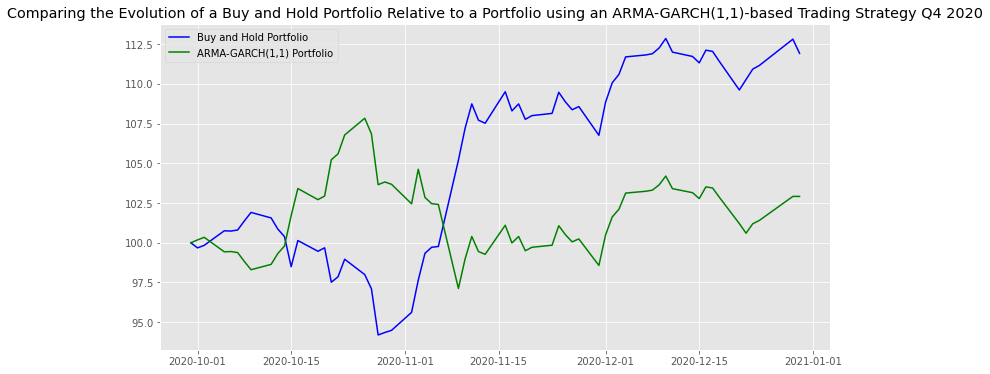

In [43]:
#Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-GARCH(1,1)-based Trading Strategy Q4 2020

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an ARMA-GARCH(1,1)-based Trading Strategy Q4 2020')
ax.plot(df_equityetf_daily_return_Q4_arimagarch['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_daily_return_Q4_arimagarch['ARMA-GARCH(1,1) Strategy'], label = 'ARMA-GARCH(1,1) Portfolio', color = 'green')
ax.legend()
plt.show()

## (5.7) Comparing the ARMA-based and ARMA-GARCH(1,1)-based Trading Strategies

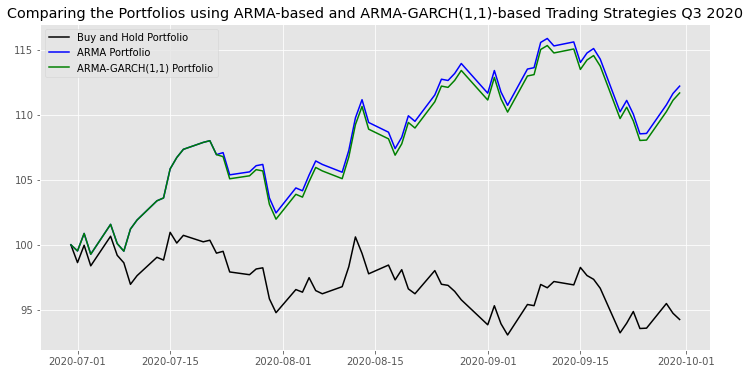

In [44]:
#Comparing the Portfolios using ARMA-based and ARMA-GARCH(1,1)-based Trading Strategies Q3 2020

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Portfolios using ARMA-based and ARMA-GARCH(1,1)-based Trading Strategies Q3 2020')
ax.plot(df_equityetf_daily_return_Q3_arimagarch['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'black')
ax.plot(df_equityetf_daily_return_Q3_arima['ARMA Strategy'], label = 'ARMA Portfolio', color = 'blue')
ax.plot(df_equityetf_daily_return_Q3_arimagarch['ARMA-GARCH(1,1) Strategy'], label = 'ARMA-GARCH(1,1) Portfolio', color = 'green')
ax.legend()
plt.show()

For both portfolios using ARMA and ARMA-GARCH(1,1) models, the trading signal generated by the model's prediction for Q3 2020 combined with our suggested strategy ensures significant outperformance relative to a buy-and-hold approach. 

Consequently, from a return generation perspective, we could choose either model, while leaning slightly more towards ARMA since it marginally outperforms the ARMA-GARCH(1,1)-based strategy. 

However, we think an ARMA-GARCH(1,1) model would be more suitable from a theoretical standpoint since it captures more aspects of the return-generating process (mean and variance) compared to an ARMA model (mean only).

In [45]:
#Model Accuracy for Q3 2020 Forecast Horizon

#ARMA-based Trading Strategy
score_matrixQ3_arima = pd.DataFrame(metrics.confusion_matrix(df_equityetf_daily_return_Q3_arima['Positive/ Negative Return'][1:], df_equityetf_daily_return_Q3_arima['Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the ARMA-based Trading Strategy for Q3 2020 forecast horizon stands at: ',round((score_matrixQ3_arima.iloc[0,0]+score_matrixQ3_arima.iloc[1,1])/np.sum(score_matrixQ3_arima.values)*100,2))

#ARMA-GARCH(1,1)-based Trading Strategy
score_matrixQ3_arimagarch = pd.DataFrame(metrics.confusion_matrix(df_equityetf_daily_return_Q3_arimagarch['Positive/ Negative Return'][1:], df_equityetf_daily_return_Q3_arimagarch['Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the ARMA-GARCH(1,1)-based Trading Strategy for Q3 2020 forecast horizon stands at: ',round((score_matrixQ3_arimagarch.iloc[0,0]+score_matrixQ3_arimagarch.iloc[1,1])/np.sum(score_matrixQ3_arimagarch.values)*100,2))

Accuracy of the ARMA-based Trading Strategy for Q3 2020 forecast horizon stands at:  61.54
Accuracy of the ARMA-GARCH(1,1)-based Trading Strategy for Q3 2020 forecast horizon stands at:  58.46


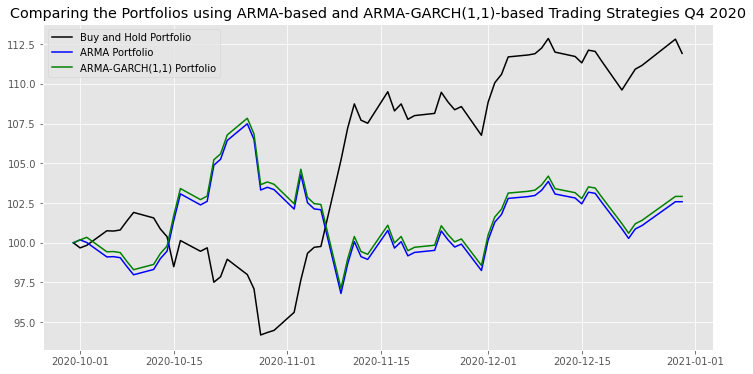

In [46]:
#Comparing the Portfolios using ARMA-based and ARMA-GARCH(1,1)-based Trading Strategies Q4 2020

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Portfolios using ARMA-based and ARMA-GARCH(1,1)-based Trading Strategies Q4 2020')
ax.plot(df_equityetf_daily_return_Q4_arimagarch['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'black')
ax.plot(df_equityetf_daily_return_Q4_arima['ARMA Strategy'], label = 'ARMA Portfolio', color = 'blue')
ax.plot(df_equityetf_daily_return_Q4_arimagarch['ARMA-GARCH(1,1) Strategy'], label = 'ARMA-GARCH(1,1) Portfolio', color = 'green')
ax.legend()
plt.show()

For Q4 2020, however, both trading strategies generate predictive signals which put them at a significant disadvantage relative to a buy-and-hold portfolio. This is especially the case from the end of October to the first two weeks of November, roughly speaking. For this reason, both models significantly underperform the buy-and-hold portfolio.

Regarding the choice between ARMA and ARMA-GARCH(1,1) models, we would stick to our previous choice i.e. the ARMA-GARCH(1,1) model for the same theoretical reason as the one mentioned above. Besides, it helps that for the Q4 2020 forecast horizon, the ARMA-GARCH(1,1) trading strategy is superior to the ARMA trading strategy from a returns perspective.

In [47]:
#Model Accuracy for Q4 2020 Forecast Horizon

#ARMA-based Trading Strategy
score_matrixQ4_arima = pd.DataFrame(metrics.confusion_matrix(df_equityetf_daily_return_Q4_arima['Positive/ Negative Return'][1:], df_equityetf_daily_return_Q4_arima['Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the ARMA-based Trading Strategy for Q4 2020 forecast horizon stands at: ',round((score_matrixQ4_arima.iloc[0,0]+score_matrixQ4_arima.iloc[1,1])/np.sum(score_matrixQ4_arima.values)*100,2))

#ARMA-GARCH(1,1)-based Trading Strategy
score_matrixQ4_arimagarch = pd.DataFrame(metrics.confusion_matrix(df_equityetf_daily_return_Q4_arimagarch['Positive/ Negative Return'][1:], df_equityetf_daily_return_Q4_arimagarch['Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the ARMA-GARCH(1,1)-based Trading Strategy for Q4 2020 forecast horizon stands at: ',round((score_matrixQ4_arimagarch.iloc[0,0]+score_matrixQ4_arimagarch.iloc[1,1])/np.sum(score_matrixQ4_arimagarch.values)*100,2))

Accuracy of the ARMA-based Trading Strategy for Q4 2020 forecast horizon stands at:  54.84
Accuracy of the ARMA-GARCH(1,1)-based Trading Strategy for Q4 2020 forecast horizon stands at:  56.45


## Step-6: Category 2 Models: Using 2 variables

In [48]:
# 6.5: VAR Strategy

In [49]:
# Checking for stationarity of log retrurns of all series for Q2 before implementing VAR Model

print('ADF test p-value for Equity Daily Volume: ',round(adfuller(df_equityetf['Volume'].loc['Apr-2020':'Jun-2020'])[1],7))
print('ADF test p-value for Equity Daily Return: ',round(adfuller(df_equityetf_daily_return.loc['Apr-2020':'Jun-2020'])[1],7))
print('ADF test p-value for Gold Daily Return: ',round(adfuller(df_goldetf_daily_return.loc['Apr-2020':'Jun-2020'])[1],7))

ADF test p-value for Equity Daily Volume:  0.0
ADF test p-value for Equity Daily Return:  0.0047529
ADF test p-value for Gold Daily Return:  0.0


**We can see that all series's log returns are stationay for Q2**

In [50]:
# Merging in to a single DataFrame

df_var_analysis_dataset = df_equityetf_daily_return.join(pd.DataFrame(df_equityetf['Volume']).join(df_goldetf_daily_return, how='inner'), how='inner').dropna()
df_var_analysis_dataset.head()

,Log Return,Volume,Gold ETF Daily Returns
Date,,,
2020-04-01,-0.044197,4250.0,0.009412
2020-04-02,0.007053,2125.0,0.016261
2020-04-03,-0.012694,1049.0,0.004925
2020-04-06,0.031616,790.0,0.027334
2020-04-07,0.020246,2332.0,-0.005369


**Testing Causation using Granger’s Causality Test**

In [51]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_var_analysis_dataset[['Equity ETF Daily Returns', 'Gold ETF Daily Returns']].loc['Apr-2020':'Jun-2020'], variables = ['Equity ETF Daily Returns', 'Gold ETF Daily Returns'])

KeyError: "['Equity ETF Daily Returns'] not in index"

In [ ]:
## VAR Model

aic = 1000
var_modelq2 = VAR(df_var_analysis_dataset.loc['Apr-2020':'Jun-2020'])
prediction_length = len(df_var_analysis_dataset.loc['Jul-2020':'Sep-2020'])
for lag in range(15):
    score = var_modelq2.fit(lag).aic
    #print('The VAR model for the 3 dimensional timeseries has the aic score as {} with lags of {}'.format(score,lag))
    if(score<aic):
        aic = score
        p = lag
print('The VAR model for the 3 dimensional timeseries has the best aic score as {} with lags of {}'.format(round(aic,2),p))
#len(df_var_analysis_dataset.loc['Apr-2020':'Jun-2020'])

*** Plotting the actual Equity ETF returns in Q2 vs predicted ETF returns in Q2. Here, we generate a tradiing signal based on the returns forecast on a partcular day. So if we obtain a +ve return, we buy the Equity ETF at the commenecement of trade and square it off at the end, else we short the Equity ETF if the trading signal is negative***

In [ ]:
df_var_q3 = df_var_analysis_dataset.loc['Jul-2020':'Sep-2020']
df_var_q3['Predicted value'] = [x[0] for x in var_modelq2.fit(p).forecast(df_var_analysis_dataset.loc['Apr-2020':'Jun-2020'].values, steps=prediction_length)]


df_var_q3['Actual Trading Sign'] = np.sign(df_var_q3['Equity ETF Daily Returns'])
df_var_q3['Predicted Trading Sign'] = np.sign(df_var_q3['Predicted value'])
df_var_q3['Buy and Hold Strategy Equity'] = df_var_q3['Equity ETF Daily Returns'].cumsum()

df_var_q3['VAR Strategy Cumulative Log Return'] = (df_var_q3['Equity ETF Daily Returns']*df_var_q3['Predicted Trading Sign'])

df_var_q3['VAR Strategy Equity'] = (df_var_q3['Equity ETF Daily Returns']*df_var_q3['Predicted Trading Sign']).cumsum()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using VAR Strategy for Q3 2020')
ax.plot(100 * (1+ df_var_q3['Buy and Hold Strategy Equity']), label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(100 * (1+df_var_q3['VAR Strategy Equity']), label = 'VAR Portfolio', color = 'green')
ax.legend()
plt.show()

In [ ]:
# Checking the accuracy of the Model using a confusion matrix

score_matrix = pd.DataFrame(metrics.confusion_matrix(df_var_q3['Actual Trading Sign'], df_var_q3['Predicted Trading Sign'], labels = [1,-1]))
print('Accuracy of the model stands at: ',round((score_matrix.iloc[0,0]+score_matrix.iloc[1,1])/np.sum(score_matrix.values)*100,2))

**Using Q3 Data to predict Q4 Data using VAR Model**

In [ ]:
# Checking for stationarity of log retrurns of all series for Q3 before implementing VAR Model

print('ADF test p-value for Equity Daily Volume: ',round(adfuller(df_equityetf['Volume'].loc['Jul-2020':'Sep-2020'])[1],7))
print('ADF test p-value for Equity Daily Return: ',round(adfuller(df_equityetf_daily_return.loc['Jul-2020':'Sep-2020'])[1],7))
print('ADF test p-value for Gold Daily Return: ',round(adfuller(df_goldetf_daily_return.loc['Jul-2020':'Sep-2020'])[1],7))

**We can see that all series's log returns are stationay for Q3**

**Testing Causation using Granger’s Causality Test**

In [ ]:
grangers_causation_matrix(df_var_analysis_dataset[['Equity ETF Daily Returns', 'Gold ETF Daily Returns']].loc['Jul-2020':'Sep-2020'], variables = ['Equity ETF Daily Returns', 'Gold ETF Daily Returns'])

In [ ]:
## VAR Model

aic = 1000
var_modelq3 = VAR(df_var_analysis_dataset.loc['Jul-2020':'Sep-2020'])
prediction_length = len(df_var_analysis_dataset.loc['Oct-2020':'Dec-2020'])
for lag in range(15):
    score = var_modelq3.fit(lag).aic
    #print('The VAR model for the 3 dimensional timeseries has the aic score as {} with lags of {}'.format(score,lag))
    if(score<aic):
        aic = score
        p = lag
print('The VAR model for the 3 dimensional timeseries has the best aic score as {} with lags of {}'.format(round(aic,2),p))
#len(df_var_analysis_dataset.loc['Apr-2020':'Jun-2020'])

In [ ]:
df_var_q4 = df_var_analysis_dataset.loc['Oct-2020':'Dec-2020']
df_var_q4['Predicted value'] = [x[0] for x in var_modelq2.fit(p).forecast(df_var_analysis_dataset.loc['Oct-2020':'Dec-2020'].values, steps=prediction_length)]

df_var_q4['Actual Trading Sign'] = np.sign(df_var_q4['Equity ETF Daily Returns'])
df_var_q4['Predicted Trading Sign'] = np.sign(df_var_q4['Predicted value'])
df_var_q4['Buy and Hold Strategy Equity'] = df_var_q4['Equity ETF Daily Returns'].cumsum()

df_var_q4['VAR Strategy Log Return'] = (df_var_q4['Equity ETF Daily Returns']*df_var_q4['Predicted Trading Sign'])

df_var_q4['VAR Strategy Equity'] = (df_var_q4['Equity ETF Daily Returns']*df_var_q4['Predicted Trading Sign']).cumsum()


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using VAR Strategy for Q4 2020')
ax.plot(100 * (1+ df_var_q4['Buy and Hold Strategy Equity']), label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(100 * (1+df_var_q4['VAR Strategy Equity']), label = 'VAR Portfolio', color = 'green')
ax.legend()
plt.show()

In [ ]:
# Checking the accuracy of the Model using a confusion matrix

score_matrix = pd.DataFrame(metrics.confusion_matrix(df_var_q4['Actual Trading Sign'], df_var_q4['Predicted Trading Sign'], labels = [1,-1]))
print('Accuracy of the model stands at: ',round((score_matrix.iloc[0,0]+score_matrix.iloc[1,1])/np.sum(score_matrix.values)*100,2))

In [ ]:
# Step 6.6: Second strategy including multivariate GARCH

In [ ]:
df_goldetf_daily_return = pd.DataFrame(np.log(df_goldetf['Close']/df_goldetf['Close'].shift(1)).iloc[1:].rename('Gold ETF Daily Returns'))
df_equityetf_daily_return = pd.DataFrame(np.log(df_equityetf['Close']/df_equityetf['Close'].shift(1)).iloc[1:].rename('Equity ETF Daily Returns'))
df_bitcoin_daily_return = pd.DataFrame(np.log(df_bitcoin['Close']/df_bitcoin['Close'].shift(1)).iloc[1:].rename('Bitcoin-USD daily Returns'))
df_all_returns = df_bitcoin_daily_return.join(pd.DataFrame(df_equityetf_daily_return).join(df_goldetf_daily_return, how='inner'), how='inner').dropna()
df_all_returns.to_csv('log_daily_returns.csv')

In [ ]:
# CSV file created in above step will used as input in R file for m-GARCH strategy. R file has been included in our zip folder.

In [ ]:
# Step 6.6: Third strategy including co-inegration

In [ ]:
def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 0, p)          # 0: No deterministic trend and p = no of lagged differences
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values
        r = 0

        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        print ("There are {} cointegration relationships".format(r))  
        return jres

In [ ]:
df_prices = pd.DataFrame(df_bitcoin['Close'].rename('Bitcoin-USD Closing')).join(pd.DataFrame(df_equityetf['Close'].rename('Equity ETF Closing')).join(pd.DataFrame(df_goldetf['Close'].rename('Gold ETF Closing')), how = 'inner'), how='inner')

In [ ]:
get_johansen(df_prices[['Equity ETF Closing',"Gold ETF Closing"]].loc['Apr-2020':'Jun-2020'], 15)

**So no cointegration relationship between Equity ETF and Gold ETF for Q2**

In [ ]:
# Checking for cointegration relationship between Equity ETF and Gold ETF for Q3

get_johansen(df_prices[['Equity ETF Closing',"Gold ETF Closing"]].loc['Jul-2020':'Sep-2020'], 15)

In [ ]:
# Checking cointegration between Equity and Gold for Q3

corr, _ = pearsonr(df_prices["Equity ETF Closing"], df_prices["Gold ETF Closing"])
print('Pearsons correlation between Gold ETF and Equity ETF for Q3 is: %.3f' % corr)

**Since the correlation between Equity and Gold prices is very low, though, there exists cointegration, yet it will not be suitable to conduct any Pair trading strategy between them**

#Step 6.8

Out of the 5 models, we choose to implement a ARMA-GARCH Model. It has outperformed Buy and hold strategy at all times and has a average accuracy of apprximately 58 percent, in predicting correct trading signals. 

In contrast, VAR Strategy has underperfomed Buy and Hold strategy all times and has a very low accuracyin predicting correct trading signals.

## Step-7: Category 2 Models: Using 3 variables

In [ ]:
# 7.5: VAR Strategy

**Using Q2 data to fit VAR model and using that to estimate Q3 data**

In [ ]:
# Calculating log returns

gld_Q2_lgreturn = np.log(df_goldetf_Q2['Close']).diff().dropna()
equity_Q2_lgreturn = np.log(df_equityetf_Q2['Close']).diff().dropna()
btc_Q2_lgreturn = np.log(df_bitcoin_Q2['Close']).diff().dropna()

In [ ]:
# Checking for stationarity

X = gld_Q2_lgreturn
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = equity_Q2_lgreturn
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = btc_Q2_lgreturn
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
# Merging Q2 log returns series in to a single DataFrame

df_gld_Q2_lgreturn = pd.DataFrame(gld_Q2_lgreturn)
df_equity_Q2_lgreturn = pd.DataFrame(equity_Q2_lgreturn)
df_btc_Q2_lgreturn = pd.DataFrame(btc_Q2_lgreturn)

df_joint = df_equity_Q2_lgreturn.join(df_gld_Q2_lgreturn, how='inner', lsuffix='_Equity', rsuffix='_GLD')
df_all_returns = df_btc_Q2_lgreturn.join(df_joint, how='inner')
df_all_returns_Q2  = df_all_returns.rename(columns = {"Close": "lgreturns_BTC","Close_Equity": "lgreturns_Equity","Close_GLD": "lgreturns_GLD"})
df_all_returns_Q2.head(5)

**Testing Causation using Granger’s Causality Test**

In [ ]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_all_returns_Q2, variables = df_all_returns_Q2.columns)

**We can see that variables lgreturns_BTC and lgreturns_GLD_x are causing lgreturns_Equity_x**

In [ ]:
# VAR Model

aic = 1000
var_model_q2 = VAR(df_all_returns_Q2)
prediction_length = len(df_equityetf_Q3.index)
for lag in range(14):
    score = var_model_q2.fit(lag).aic
    #print('The VAR model for the 3 dimensional timeseries has the aic score as {} with lags of {}'.format(score,lag))
    if(score<aic):
        aic = score
        p = lag
        
      
print('The VAR model for the 3 dimensional timeseries has the best aic score as {} with lags of {}'.format(round(aic,2),p))

In [ ]:
final_var_model_q2 = var_model_q2.fit(p)

final_var_model_q2.summary()

In [ ]:
#Forecasting Returns for Q3

forecast_input_Q3 = df_all_returns_Q2.values

forecast_Q3 = final_var_model_q2.forecast(y=forecast_input_Q3, steps = prediction_length)


forecast_Q3 = pd.DataFrame(forecast_Q3)
forecast_Equity_Q3 = forecast_Q3[1]
forecast_Equity_Q3 = pd.DataFrame(forecast_Equity_Q3)

In [ ]:
df_equityetf_Q3_forecast = pd.DataFrame(df_equityetf_Q3["Close"])

forecast_Equity_Q3.index = df_equityetf_Q3_forecast.index

df_equityetf_Q3_forecast["Forecasted Return"] = forecast_Equity_Q3

df_equityetf_Q3_forecast

In [ ]:
equity_Q3_lgreturn = np.log(df_equityetf_Q3['Close']).diff()
equity_Q3_lgreturn = pd.DataFrame(equity_Q3_lgreturn)

df_equityetf_Q3_forecast["Actual_LogReturn"] = equity_Q3_lgreturn

df_equityetf_Q3_forecast['Cumulative Log Return'] = df_equityetf_Q3_forecast['Actual_LogReturn'].cumsum()

df_equityetf_Q3_forecast['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_Q3_forecast['Cumulative Log Return'])

df_equityetf_Q3_forecast.at['2020-06-30', 'Buy and Hold Strategy'] = 100

df_equityetf_Q3_forecast['Actual Trading Signal'] = np.sign(df_equityetf_Q3_forecast['Actual_LogReturn'])

df_equityetf_Q3_forecast['Predicted Trading Signal'] = np.sign(forecast_Equity_Q3)

df_equityetf_Q3_forecast['VAR Strategy Cumulative Log Return'] = (df_equityetf_Q3_forecast['Actual_LogReturn']*df_equityetf_Q3_forecast['Predicted Trading Signal']).cumsum()

df_equityetf_Q3_forecast['VAR Strategy'] = 100*np.exp(df_equityetf_Q3_forecast['VAR Strategy Cumulative Log Return'])

df_equityetf_Q3_forecast.at['2020-06-30', 'VAR Strategy'] = 100

df_equityetf_Q3_forecast

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an VAR-based Trading Strategy Q3 2020')
ax.plot(df_equityetf_Q3_forecast['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_Q3_forecast['VAR Strategy'], label = 'VAR Portfolio', color = 'green')
ax.legend()
plt.show()

In [ ]:
# Checking the accuracy of the Model using a confusion matrix

score_matrix = pd.DataFrame(metrics.confusion_matrix(df_equityetf_Q3_forecast['Actual Trading Signal'][1:], df_equityetf_Q3_forecast['Predicted Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the model stands at: ',round((score_matrix.iloc[0,0]+score_matrix.iloc[1,1])/np.sum(score_matrix.values)*100,2))

**Using Q3 data to fit VAR model and using that to estimate Q4 data**

In [ ]:
# Calculating log returns

gld_Q3_lgreturn = np.log(df_goldetf_Q3['Close']).diff().dropna()
equity_Q3_lgreturn = np.log(df_equityetf_Q3['Close']).diff().dropna()
btc_Q3_lgreturn = np.log(df_bitcoin_Q3['Close']).diff().dropna()

In [ ]:
# Checking for stationarity

X = gld_Q3_lgreturn
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = equity_Q3_lgreturn
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = btc_Q3_lgreturn
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
#Merging Q3 log returns series in to a single DataFrame

df_gld_Q3_lgreturn = pd.DataFrame(gld_Q3_lgreturn)
df_equity_Q3_lgreturn = pd.DataFrame(equity_Q3_lgreturn)
df_btc_Q3_lgreturn = pd.DataFrame(btc_Q3_lgreturn)

df_joint = df_equity_Q3_lgreturn.join(df_gld_Q3_lgreturn, how='inner', lsuffix='_Equity', rsuffix='_GLD')
df_all_returns = df_btc_Q3_lgreturn.join(df_joint, how='inner')
df_all_returns_Q3  = df_all_returns.rename(columns = {"Close": "lgreturns_BTC","Close_Equity": "lgreturns_Equity","Close_GLD": "lgreturns_GLD"})
df_all_returns_Q3.head(5)

**Testing Causation using Granger’s Causality Test**

In [ ]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_all_returns_Q3, variables = df_all_returns_Q3.columns)

In [ ]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_all_returns_Q3, variables = df_all_returns_Q3.columns)

In [ ]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_all_returns_Q3, variables = df_all_returns_Q3.columns)

**We can see that variables lgreturns_BTC and lgreturns_GLD_x are causing lgreturns_Equity_x**

In [ ]:
# VAR Model

aic = 1000
var_model_q3 = VAR(df_all_returns_Q3)
prediction_length = len(df_equityetf_Q4.index)
for lag in range(15):
    score = var_model_q3.fit(lag).aic
    #print('The VAR model for the 3 dimensional timeseries has the aic score as {} with lags of {}'.format(score,lag))
    if(score<aic):
        aic = score
        p = lag
        
      
print('The VAR model for the 3 dimensional timeseries has the best aic score as {} with lags of {}'.format(round(aic,2),p))

In [ ]:
final_var_model_q3 = var_model_q3.fit(p)

final_var_model_q3.summary()

In [ ]:
#Forecasting Returns for Q4

forecast_input_Q4 = df_all_returns_Q3.values

forecast_Q4 = final_var_model_q3.forecast(y=forecast_input_Q4, steps = prediction_length)


forecast_Q4 = pd.DataFrame(forecast_Q4)
forecast_Equity_Q4 = forecast_Q4[1]
forecast_Equity_Q4 = pd.DataFrame(forecast_Equity_Q4)

In [ ]:
df_equityetf_Q4_forecast = pd.DataFrame(df_equityetf_Q4["Close"])

forecast_Equity_Q4.index = df_equityetf_Q4_forecast.index

df_equityetf_Q4_forecast["Forecasted Return"] = forecast_Equity_Q4

df_equityetf_Q4_forecast

In [ ]:
equity_Q4_lgreturn = np.log(df_equityetf_Q4['Close']).diff()
equity_Q4_lgreturn = pd.DataFrame(equity_Q4_lgreturn)

df_equityetf_Q4_forecast["Actual_LogReturn"] = equity_Q4_lgreturn

df_equityetf_Q4_forecast['Cumulative Log Return'] = df_equityetf_Q4_forecast['Actual_LogReturn'].cumsum()

df_equityetf_Q4_forecast['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_Q4_forecast['Cumulative Log Return'])

df_equityetf_Q4_forecast.at['2020-09-30', 'Buy and Hold Strategy'] = 100

df_equityetf_Q4_forecast['Actual Trading Signal'] = np.sign(df_equityetf_Q4_forecast['Actual_LogReturn'])

df_equityetf_Q4_forecast['Predicted Trading Signal'] = np.sign(forecast_Equity_Q4)

df_equityetf_Q4_forecast['VAR Strategy Cumulative Log Return'] = (df_equityetf_Q4_forecast['Actual_LogReturn']*df_equityetf_Q4_forecast['Predicted Trading Signal']).cumsum()

df_equityetf_Q4_forecast['VAR Strategy'] = 100*np.exp(df_equityetf_Q4_forecast['VAR Strategy Cumulative Log Return'])

df_equityetf_Q4_forecast.at['2020-09-30', 'VAR Strategy'] = 100

df_equityetf_Q4_forecast

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an VAR-based Trading Strategy Q4 2020')
ax.plot(df_equityetf_Q4_forecast['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_Q4_forecast['VAR Strategy'], label = 'VAR Portfolio', color = 'green')
ax.legend()
plt.show()

In [ ]:
# Checking the accuracy of the Model using a confusion matrix

score_matrix = pd.DataFrame(metrics.confusion_matrix(df_equityetf_Q4_forecast['Actual Trading Signal'][1:], df_equityetf_Q4_forecast['Predicted Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the model stands at: ',round((score_matrix.iloc[0,0]+score_matrix.iloc[1,1])/np.sum(score_matrix.values)*100,2))

In [ ]:
# Step 7.6: Second trading strategy including cointegration

**Performing Co-integration Test**

In [ ]:
# Checking for stationarity at level series

X = df_goldetf_Q2["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_equityetf_Q2["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_bitcoin_Q2["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

**Gold ETF is already stationary in Q2. So we will try to perform cointegration test for only Equity ETF and Bitcoin in Q2**

In [ ]:
# Differencing at I(1)

df_equityetf_diff_Q2 = df_equityetf_Q2["Close"].diff()
df_equityetf_diff_Q2 = df_equityetf_diff_Q2.dropna()

df_bitcoin_diff_Q2 = df_bitcoin_Q2["Close"].diff()
df_bitcoin_diff_Q2 = df_bitcoin_diff_Q2.dropna()

In [ ]:
# Checking for stationarity at I(1)

X = df_equityetf_diff_Q2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_bitcoin_diff_Q2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
# Merging series in to a single DataFrame

df_equityetf_Q2 = pd.DataFrame(df_equityetf_Q2["Close"])

df_bitcoin_Q2 = pd.DataFrame(df_bitcoin_Q2["Close"])

df_merged_Q2 = df_equityetf_Q2.join(df_bitcoin_Q2, how = "inner", lsuffix='_Equity', rsuffix='_BTC')

df_merged_Q2.head(5)

In [ ]:
# Checking for correlation

corr, _ = pearsonr(df_merged_Q2["Close_Equity"], df_merged_Q2["Close_BTC"])
print('Pearsons correlation between Gold ETF and Equity ETF for Q2 is: %.3f' % corr)

**We can see strong correlation between Equity ETF close prices and Bitcoin prices for Q2**

In [ ]:
#Engle-Granger Test for co-integration

egq3bitcoinequity = engle_granger(df_merged_Q2["Close_Equity"],df_merged_Q2["Close_BTC"], trend='c')
egq3bitcoinequity

**There is cointegration at 10% significance level**

In [ ]:
# Johansen Test for Co-Integration

sresq2 = get_johansen(df_merged_Q2[['Close_Equity',"Close_BTC"]], 15)

**Implementing Pairs Trading strategy for Q3 from model built using Q2 data**

In [ ]:
plt.scatter(df_merged_Q2["Close_Equity"],df_merged_Q2["Close_BTC"])

In [ ]:
df_equityetf_Q2 = pd.DataFrame(df_equityetf_Q2["Close"])

df_bitcoin_Q2 = pd.DataFrame(df_bitcoin_Q2["Close"])

df_merged_Q2 = df_equityetf_Q2.join(df_bitcoin_Q2, how = "inner", lsuffix='_Equity', rsuffix='_BTC')

df_merged_Q2.head(5)

In [ ]:
# Fitting OLS Model using Q2 Data

OLS_Q2 = OLS(df_merged_Q2["Close_Equity"],df_merged_Q2["Close_BTC"]).fit()

OLS_Q2.summary()

In [ ]:
df_bitcoin_Q3_lag = bitcoin.history(start="2020-06-04",  end="2020-09-30")

df_equityetf_Q3_lag = equity_etf.history(start="2020-06-04",  end="2020-09-30")

df_bitcoin_Q3_lag = pd.DataFrame(df_bitcoin_Q3_lag["Close"])

df_equityetf_Q3_lag = pd.DataFrame(df_equityetf_Q3_lag["Close"])


df_merged_Q3 = df_equityetf_Q3_lag.join(df_bitcoin_Q3_lag, how = "inner", lsuffix='_Equity', rsuffix='_BTC')

df_merged_Q3.head(5)


In [ ]:
Equity_Prediction_Q3 = OLS_Q2.predict(df_merged_Q3["Close_BTC"])

df_merged_Q3["Equity_Prediction_Q3"] = Equity_Prediction_Q3

df_merged_Q3["Residual_Values"] = df_merged_Q3["Equity_Prediction_Q3"] - df_merged_Q3["Close_Equity"]

df_merged_Q3['Residuals_MA_15'] = df_merged_Q3["Residual_Values"].rolling(20).mean().shift()

df_merged_Q3['Residuals_MA_15_stddev'] = df_merged_Q3["Residual_Values"].std()

df_merged_Q3["Predicted_Z-Score"] = (df_merged_Q3["Residual_Values"] - df_merged_Q3['Residuals_MA_15'])/(df_merged_Q3['Residuals_MA_15_stddev'])

df_merged_Q3.dropna(inplace = True)

In [ ]:
# Generating signals for Equity ETF abd Bitcoin

Equity_Signal = []

for row in df_merged_Q3["Predicted_Z-Score"]:
    
    if row > 1:
        Equity_Signal.append(-1)
    elif row < 1 and row > -1:
        Equity_Signal.append(0)
    elif row < -1:
        Equity_Signal.append(1)
        
        
Bitcoin_Signal = []

for row in df_merged_Q3["Predicted_Z-Score"]:
    
    if row > 1:
        Bitcoin_Signal.append(1)
    elif row < 1 and row > -1:
        Bitcoin_Signal.append(0)
    elif row < -1:
        Bitcoin_Signal.append(-1)

In [ ]:
df_merged_Q3['Equity_Signal'] = Equity_Signal
df_merged_Q3["Bitcoin_Signal"] = Bitcoin_Signal

df_merged_Q3["Actual_Log_return_Equity"] = np.log(df_merged_Q3['Close_Equity']).diff()
df_merged_Q3["Actual_Log_return_Bitcoin"] = np.log(df_merged_Q3['Close_BTC']).diff()

df_merged_Q3['Cumulative Log Return_Equity'] = df_merged_Q3['Actual_Log_return_Equity'].cumsum()
df_merged_Q3['Cumulative Log Return_Bitcoin'] = df_merged_Q3['Actual_Log_return_Bitcoin'].cumsum()

df_merged_Q3['Buy and Hold Strategy_Equity'] = 100*np.exp(df_merged_Q3['Cumulative Log Return_Equity'])
df_merged_Q3['Buy and Hold Strategy_Bitcoin'] = 100*np.exp(df_merged_Q3['Cumulative Log Return_Bitcoin'])

df_merged_Q3.at['2020-07-01', 'Buy and Hold Strategy_Equity'] = 100
df_merged_Q3.at['2020-07-01', 'Buy and Hold Strategy_Bitcoin'] = 100


df_merged_Q3['Pairs Trading Strategy Log Return'] = ((df_merged_Q3['Actual_Log_return_Equity']*df_merged_Q3['Equity_Signal'])) + ((df_merged_Q3['Actual_Log_return_Bitcoin']*df_merged_Q3['Bitcoin_Signal']))
df_merged_Q3['Pairs Trading Strategy Cumulative Log Return'] = df_merged_Q3['Pairs Trading Strategy Log Return'].cumsum()
df_merged_Q3['Pairs Trading Strategy'] = 100*np.exp(df_merged_Q3['Pairs Trading Strategy Cumulative Log Return'])
df_merged_Q3.at['2020-07-01', 'Pairs Trading Strategy'] = 100


df_merged_Q3.head(3)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an Pairs Trading Strategy for Q3 2020')
ax.plot(df_merged_Q3['Buy and Hold Strategy_Equity'], label = 'Buy and Hold Portfolio_Equity', color = 'blue')
ax.plot(df_merged_Q3['Buy and Hold Strategy_Bitcoin'], label = 'Buy and Hold Portfolio_Bitcoin', color = 'red')
ax.plot(df_merged_Q3["Pairs Trading Strategy"], label = 'Pairs Trading Strategy Portgfolio', color = 'green')

ax.legend()
plt.show()

In [ ]:
# Checking stationarity of level series(s) for Q3

X = df_goldetf_Q3["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_equityetf_Q3["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_bitcoin_Q3["Close"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
# Checking stationarity of series(s) ay I(1) for Q3

df_equityetf_diff_Q3 = df_equityetf_Q3["Close"].diff()
df_equityetf_diff_Q3 = df_equityetf_diff_Q3.dropna()

df_goldetf_diff_Q3 = df_equityetf_Q3["Close"].diff()
df_goldetf_diff_Q3 = df_equityetf_diff_Q3.dropna()

df_bitcoin_diff_Q3 = df_bitcoin_Q3["Close"].diff()
df_bitcoin_diff_Q3 = df_bitcoin_diff_Q3.dropna()

In [ ]:
X = df_equityetf_diff_Q3.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_goldetf_diff_Q3.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
X = df_bitcoin_diff_Q3.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [ ]:
df_equityetf_Q3 = pd.DataFrame(df_equityetf_Q3["Close"])

df_goldetf_Q3 = pd.DataFrame(df_goldetf_Q3["Close"])

df_bitcoin_Q3 = pd.DataFrame(df_bitcoin_Q3["Close"])

df_joint = df_equityetf_Q3.join(df_goldetf_Q3, how='inner', lsuffix='_Equity', rsuffix='_GLD')
df_all_series_Q3 = df_bitcoin_Q3.join(df_joint, how='inner')
df_all_series_Q3 = df_all_series_Q3.rename(columns = {"Close": "Close_BTC"})

df_all_series_Q3

In [ ]:
#Performing co-integration test between all 3 series for Q3

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_all_series_Q3)

**We can see that none of the series are cointegrated with each other in Q3**

In [ ]:
#Step 7.7: Vector Error-Correction Model

**We have already seen that Equity ETF and Bitcoin are non stationary at levels but stationary at (1) and also they are cointegrated in Q2**

In [ ]:
# VECM Model


forecast_length = len(df_equityetf_Q3.index)

vecm = VECM(endog = df_merged_Q2, k_ar_diff = 9, coint_rank = 3, deterministic = "li")
vecm_fit = vecm.fit()
vecm_forecast_Q3 = vecm_fit.predict(steps= forecast_length)

vecm_equity_forecast_Q3 = pd.DataFrame(vecm_forecast_Q3)

vecm_equity_forecast_Q3 = pd.DataFrame(vecm_equity_forecast_Q3[0])

In [ ]:
df_equityetf_Q3_vecm_forecast = pd.DataFrame(df_equityetf_Q3["Close"])

vecm_equity_forecast_Q3.index = df_equityetf_Q3_forecast.index

df_equityetf_Q3_vecm_forecast["VECM Forecast"] = vecm_equity_forecast_Q3

df_equityetf_Q3_vecm_forecast["VECM Forecast Log Return"] = np.log(df_equityetf_Q3_vecm_forecast["VECM Forecast"]).diff()

df_equityetf_Q3_vecm_forecast.head(5)

In [ ]:
equity_Q3_lgreturn = np.log(df_equityetf_Q3['Close']).diff()
equity_Q3_lgreturn = pd.DataFrame(equity_Q3_lgreturn)

df_equityetf_Q3_vecm_forecast["Actual_LogReturn"] = equity_Q3_lgreturn

df_equityetf_Q3_vecm_forecast['Cumulative Log Return'] = df_equityetf_Q3_vecm_forecast['Actual_LogReturn'].cumsum()

df_equityetf_Q3_vecm_forecast['Buy and Hold Strategy'] = 100*np.exp(df_equityetf_Q3_vecm_forecast['Cumulative Log Return'])

df_equityetf_Q3_vecm_forecast.at['2020-06-30', 'Buy and Hold Strategy'] = 100

df_equityetf_Q3_vecm_forecast['Actual Trading Signal'] = np.sign(df_equityetf_Q3_vecm_forecast['Actual_LogReturn'])

df_equityetf_Q3_vecm_forecast['Predicted Trading Signal'] = np.sign(df_equityetf_Q3_vecm_forecast['VECM Forecast Log Return'])

df_equityetf_Q3_vecm_forecast['VECM Strategy Cumulative Log Return'] = (df_equityetf_Q3_vecm_forecast['Actual_LogReturn']*df_equityetf_Q3_vecm_forecast['Predicted Trading Signal']).cumsum()

df_equityetf_Q3_vecm_forecast['VECM Strategy'] = 100*np.exp(df_equityetf_Q3_vecm_forecast['VECM Strategy Cumulative Log Return'])

df_equityetf_Q3_vecm_forecast.at['2020-06-30', 'VECM Strategy'] = 100

df_equityetf_Q3_vecm_forecast

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Comparing the Evolution of a Buy and Hold Portfolio Relative to a Portfolio using an VECM-based Trading Strategy Q3 2020')
ax.plot(df_equityetf_Q3_vecm_forecast['Buy and Hold Strategy'], label = 'Buy and Hold Portfolio', color = 'blue')
ax.plot(df_equityetf_Q3_vecm_forecast['VECM Strategy'], label = 'VECM Portfolio', color = 'green')
ax.legend()
plt.show()

In [ ]:
# Checking the accuracy of the Model using a confusion matrix

score_matrix = pd.DataFrame(metrics.confusion_matrix(df_equityetf_Q3_vecm_forecast["Actual Trading Signal"][1:], df_equityetf_Q3_vecm_forecast['Predicted Trading Signal'][1:], labels = [1,-1]))
print('Accuracy of the model stands at: ',round((score_matrix.iloc[0,0]+score_matrix.iloc[1,1])/np.sum(score_matrix.values)*100,2))

**We have already observed that none of the series are cointegrated with each other in Q3. so we are not using that data to implement VECM model to estimate Q4 data**

#Step 7.8

Out of the 8 models, we choose to implement a Pairs Trading strategy model. It has outperformed all other models in terms of returns generated and also has accuracy of 60%, in predicting correct trading signals. 

This may be due to cointegration observed between Equity ETF and Bitcoin price series and also high correlation (around 81%) between them. So they act as perfect variables, using which we can implement a Pairs Trading Strategy.